In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasgui import show

In [2]:
df_cleaned = pd.read_csv('data/arabica_data_cleaned.csv')
df2_cleaned = pd.read_csv('data/robusta_data_cleaned.csv')

df_raw = pd.read_csv('data/arabica_ratings_raw.csv')
df2_raw = pd.read_csv('data/robusta_ratings_raw.csv')

In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1165 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

In [93]:
show(df_cleaned)

In [94]:
df = df_cleaned.drop(['Owner', 'Farm.Name', 'Mill', 'ICO.Number', 'Company', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
                    'Grading.Date', 'Owner.1', 'Certification.Body', 'Certification.Address', 'Certification.Contact',
                     'unit_of_measurement'], axis=1)

In [54]:
df.head()

,Species,Country.of.Origin,Altitude,Region,Producer,Harvest.Year,Variety,Processing.Method,Aroma,Flavor,...,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,Ethiopia,1950-2200,guji-hambela,METAD PLC,2014,NaN,Washed / Wet,8.67,8.83,...,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",1950.0,2200.0,2075.0
1,Arabica,Ethiopia,1950-2200,guji-hambela,METAD PLC,2014,Other,Washed / Wet,8.75,8.67,...,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",1950.0,2200.0,2075.0
2,Arabica,Guatemala,1600 - 1800 m,NaN,NaN,NaN,Bourbon,NaN,8.42,8.50,...,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",1600.0,1800.0,1700.0
3,Arabica,Ethiopia,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,2014,NaN,Natural / Dry,8.17,8.58,...,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",1800.0,2200.0,2000.0
4,Arabica,Ethiopia,1950-2200,guji-hambela,METAD PLC,2014,Other,Washed / Wet,8.25,8.50,...,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",1950.0,2200.0,2075.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1311 non-null   object 
 1   Country.of.Origin     1310 non-null   object 
 2   Lot.Number            270 non-null    object 
 3   Altitude              1088 non-null   object 
 4   Region                1254 non-null   object 
 5   Producer              1081 non-null   object 
 6   Harvest.Year          1264 non-null   object 
 7   Variety               1110 non-null   object 
 8   Processing.Method     1159 non-null   object 
 9   Aroma                 1311 non-null   float64
 10  Flavor                1311 non-null   float64
 11  Aftertaste            1311 non-null   float64
 12  Acidity               1311 non-null   float64
 13  Body                  1311 non-null   float64
 14  Balance               1311 non-null   float64
 15  Uniformity           

In [4]:
def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-1, 1])

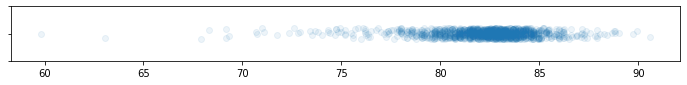

In [34]:
fig, ax = plt.subplots(1, figsize=(12, 1))
one_dim_scatterplot(df['Total.Cup.Points'], ax, jitter=0.2, alpha=0.08)

In [27]:
df[['Total.Cup.Points']][df['Total.Cup.Points']==0]

,Total.Cup.Points
1310,0.0


In [30]:
df.iloc[[1310]]

,Species,Country.of.Origin,Company,Altitude,Region,Harvest.Year,Variety,Processing.Method,Aroma,Flavor,...,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1310,Arabica,Honduras,cigrah s.a de c.v,1400,comayagua,2017,Caturra,NaN,0.0,0.0,...,0.0,0.12,0,0.0,Green,2,"April 28th, 2018",1400.0,1400.0,1400.0


In [57]:
df.drop(index=1310, axis=0, inplace=True)

In [97]:
df[['Country.of.Origin', 'Total.Cup.Points']].groupby('Country.of.Origin').mean('Total.Cup.Points').sort_values('Total.Cup.Points')

,Total.Cup.Points
Country.of.Origin,
India,76.830000
Haiti,77.180000
Cote d?Ivoire,79.330000
Honduras,79.357547
Nicaragua,80.458077
Mauritius,80.500000
Myanmar,80.750000
Philippines,80.834000
Mexico,80.890085


In [132]:
coffee_by_region = df.groupby('Country.of.Origin').count()[['Unnamed: 0']].sort_values('Unnamed: 0', ascending=False)
coffee_by_region[coffee_by_region['Unnamed: 0'] >= 20]

,Unnamed: 0
Country.of.Origin,
Mexico,236
Colombia,183
Guatemala,181
Brazil,132
Taiwan,75
United States (Hawaii),73
Honduras,53
Costa Rica,51
Ethiopia,44


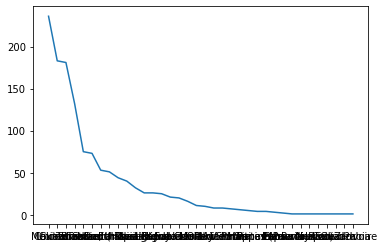

In [133]:
fig, ax = plt.subplots()
ax.plot(coffee_by_region);